#Deteccion de Bordes - Comparativo Scikit-Image, Sobel-Prewitt- YOLOv5

Autor: Serafini, Martin Nicolas

Abril 2025


Este código tiene como objetivo principal explorar y demostrar diferentes métodos de detección de bordes y objetos en imágenes utilizando bibliotecas de Python como scikit-image y YOLOv5.

##Carga de la imagen

In [1]:
import matplotlib.pyplot as plt
from skimage import io

In [2]:
!wget https://cdn.motor1.com/images/mgl/g4MqV8/s3/059.jpg

--2025-04-20 02:13:39--  https://cdn.motor1.com/images/mgl/g4MqV8/s3/059.jpg
Resolving cdn.motor1.com (cdn.motor1.com)... 18.238.80.115, 18.238.80.111, 18.238.80.8, ...
Connecting to cdn.motor1.com (cdn.motor1.com)|18.238.80.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68821 (67K) [image/jpeg]
Saving to: ‘059.jpg.4’

059.jpg.4           100%[===================>]  67.21K  --.-KB/s    in 0.02s   

2025-04-20 02:13:39 (4.22 MB/s) - ‘059.jpg.4’ saved [68821/68821]



In [3]:
imagen_archivo = "059.jpg"

--2025-04-20 02:13:43--  https://cdn.motor1.com/images/mgl/g4MqV8/s3/059.jpg
Resolving cdn.motor1.com (cdn.motor1.com)... 18.238.80.115, 18.238.80.111, 18.238.80.8, ...
Connecting to cdn.motor1.com (cdn.motor1.com)|18.238.80.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68821 (67K) [image/jpeg]
Saving to: ‘059.jpg.5’

059.jpg.5           100%[===================>]  67.21K  --.-KB/s    in 0.01s   

2025-04-20 02:13:43 (5.00 MB/s) - ‘059.jpg.5’ saved [68821/68821]



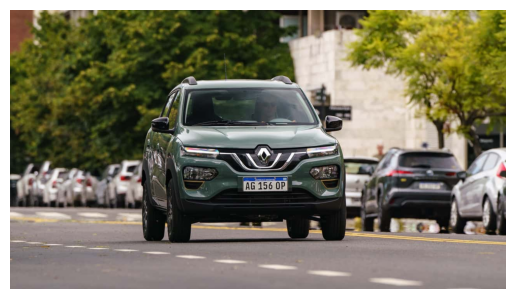

In [4]:
!wget https://cdn.motor1.com/images/mgl/g4MqV8/s3/059.jpg
imagen_archivo = "059.jpg"
imagen = io.imread(imagen_archivo)
plt.imshow(imagen)
plt.axis('off')
plt.show()


##Scikit-Image (skimage.feature.canny)
Librería: scikit-image

Método: skimage.feature.canny

Explicación:
Esta implementación de Canny en scikit-image es más precisa que la de OpenCV porque permite ajustar el parámetro sigma, que controla la suavidad del filtro Gaussiano.

Parámetros:
- image: La imagen de entrada (debe estar en escala de grises).
- sigma: Controla la cantidad de suavizado antes de la detección de bordes (valores entre 0.5 y 2 son usualmente óptimos).
- low_threshold: Umbral inferior para la detección de bordes.
- high_threshold: Umbral superior para la detección de bordes.
- use_quantiles: Si es True, los umbrales se interpretan como cuantiles en lugar de valores de intensidad.
- mask: Máscara booleana opcional para restringir la detección de bordes a ciertas áreas.



In [5]:
import matplotlib.pyplot as plt
from skimage import io, color, feature
import numpy as np
import ipywidgets as widgets
from IPython.display import display


# Cargar imagen y convertir a escala de grises
imagen = io.imread(imagen_archivo)
imagen_gris = color.rgb2gray(imagen)
alto, ancho = imagen_gris.shape

# Función para crear máscaras personalizadas
def crear_mascara_personalizada(forma, centro_x, centro_y, tam_x, tam_y):
    Y, X = np.ogrid[:alto, :ancho]
    if forma == 'circular':
        radio = tam_x  # usamos solo un tamaño como radio
        mascara = (X - centro_x)**2 + (Y - centro_y)**2 <= radio**2
    elif forma == 'rectangular':
        x1, x2 = max(0, centro_x - tam_x // 2), min(ancho, centro_x + tam_x // 2)
        y1, y2 = max(0, centro_y - tam_y // 2), min(alto, centro_y + tam_y // 2)
        mascara = np.zeros((alto, ancho), dtype=bool)
        mascara[y1:y2, x1:x2] = True
    return mascara

# Función para aplicar Canny y mostrar resultados
def detectar_bordes(sigma, low_th, high_th, use_quantiles, usar_mascara, forma_mascara, centro_x, centro_y, tam_x, tam_y):
    mascara = crear_mascara_personalizada(forma_mascara, centro_x, centro_y, tam_x, tam_y) if usar_mascara else None

    bordes = feature.canny(
        imagen_gris,
        sigma=sigma,
        low_threshold=low_th,
        high_threshold=high_th,
        use_quantiles=use_quantiles,
        mask=mascara
    )

    plt.figure(figsize=(10, 10))
    plt.imshow(bordes, cmap='gray')
    plt.title('Bordes detectados con Scikit-Image Canny', fontsize=14)
    plt.axis("off")
    plt.show()

# Widgets de control
slider_sigma = widgets.FloatSlider(value=1.2, min=0.1, max=3.0, step=0.1, description='Sigma')
slider_low = widgets.FloatSlider(value=0.1, min=0.0, max=1.0, step=0.05, description='Low Thresh')
slider_high = widgets.FloatSlider(value=0.3, min=0.0, max=1.0, step=0.05, description='High Thresh')
checkbox_quantiles = widgets.Checkbox(value=False, description='Usar cuantiles')
checkbox_mascara = widgets.Checkbox(value=False, description='Usar máscara')

dropdown_forma = widgets.Dropdown(
    options=['circular', 'rectangular'],
    value='circular',
    description='Forma máscara'
)

slider_cx = widgets.IntSlider(value=ancho//2, min=0, max=ancho, description='Centro X')
slider_cy = widgets.IntSlider(value=alto//2, min=0, max=alto, description='Centro Y')
slider_tx = widgets.IntSlider(value=100, min=10, max=ancho, description='Tamaño X / Radio')
slider_ty = widgets.IntSlider(value=100, min=10, max=alto, description='Tamaño Y (rect)')

# Organizar interfaz
ui = widgets.VBox([
    slider_sigma,
    slider_low,
    slider_high,
    checkbox_quantiles,
    checkbox_mascara,
    dropdown_forma,
    slider_cx,
    slider_cy,
    slider_tx,
    slider_ty
])

# Conectar widgets con la función
out = widgets.interactive_output(
    detectar_bordes,
    {
        'sigma': slider_sigma,
        'low_th': slider_low,
        'high_th': slider_high,
        'use_quantiles': checkbox_quantiles,
        'usar_mascara': checkbox_mascara,
        'forma_mascara': dropdown_forma,
        'centro_x': slider_cx,
        'centro_y': slider_cy,
        'tam_x': slider_tx,
        'tam_y': slider_ty
    }
)

display(ui, out)


Output()

##Sobel y Prewitt (skimage.filters.sobel y skimage.filters.prewitt)
Librería: scikit-image

Método: skimage.filters.sobel y skimage.filters.prewitt

Explicación:

Los métodos Sobel y Prewitt son dos operadores clásicos de detección de bordes que estiman los gradientes de intensidad en una imagen (estiman cómo varía la intensidad de los píxeles en las direcciones horizontal y vertical, que implica  medir qué tan rápido cambia la intensidad de un píxel a otro). Aunque son muy parecidos en su propósito, tienen diferencias sutiles en la forma en que calculan esos gradientes.

Estos filtros detectan bordes calculando la derivada de la imagen. Son más sensibles a los cambios de intensidad y pueden ser útiles cuando se necesita una detección de bordes más suave.

Tanto Sobel como Prewitt aplican convolución sobre la imagen utilizando máscaras (kernels) para calcular:

- El cambio de intensidad en dirección horizontal (Gx) y vertical (Gy)
- A partir de eso, estiman la magnitud del gradiente, que revela los bordes

Diferencias principales :
- Kernels (máscaras):
  - Sobel usa una ponderación mayor en el centro lo cual mejora la detección de bordes suaves
  - Prewitt usa pesos uniformes por eso puede responder más a ruido o detalles pequeños
- Sensibilidad al ruido:
  - Sobel menos sensible
  - Prewitt más sensible
- Detección de bordes:
  - Sobel más preciso en líneas suaves
  - Prewitt más rápido, pero más tosco
- Costo computacionalmente:
  - Sobel levemente más costoso
  - Prewitt ligeramente más simple

###Ejemplo de uso (Sobel)

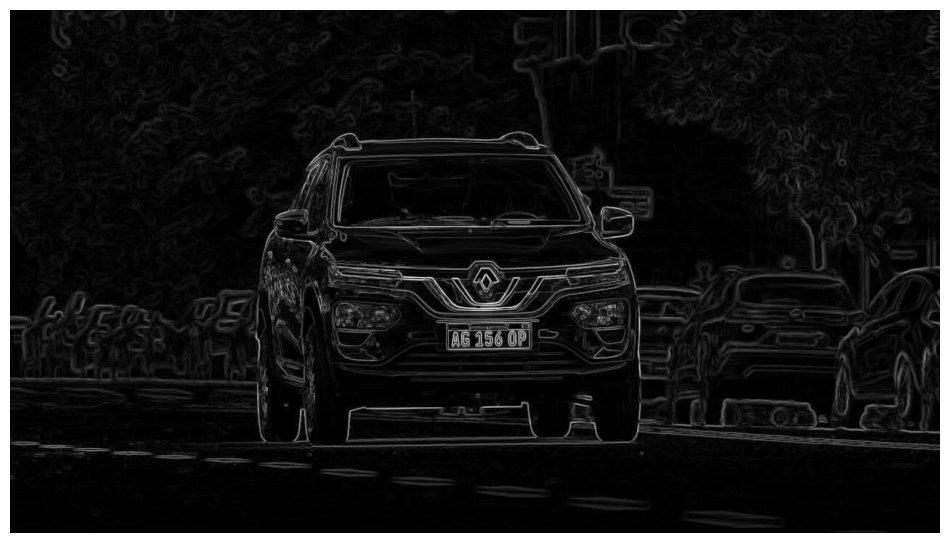

In [7]:
from skimage import io, color
from skimage.filters import sobel
import matplotlib.pyplot as plt

# Cargo la imagen desde el archivo
imagen_archivo = io.imread('059.jpg')
# Si es RGB, la convierto a escala de grises
if imagen_archivo.ndim == 3:
    imagen_gris = color.rgb2gray(imagen_archivo)
else:
    imagen_gris = imagen_archivo  # Ya está en escala de grises

# Aplico el filtro Sobel
imagen_sobel = sobel(imagen_gris)

# Muestro la imagen de bordes
plt.figure(figsize=(12,12))
plt.imshow(imagen_sobel, cmap='gray')
plt.axis("off")
plt.show()

###Ejemplo de uso (Prewitt):

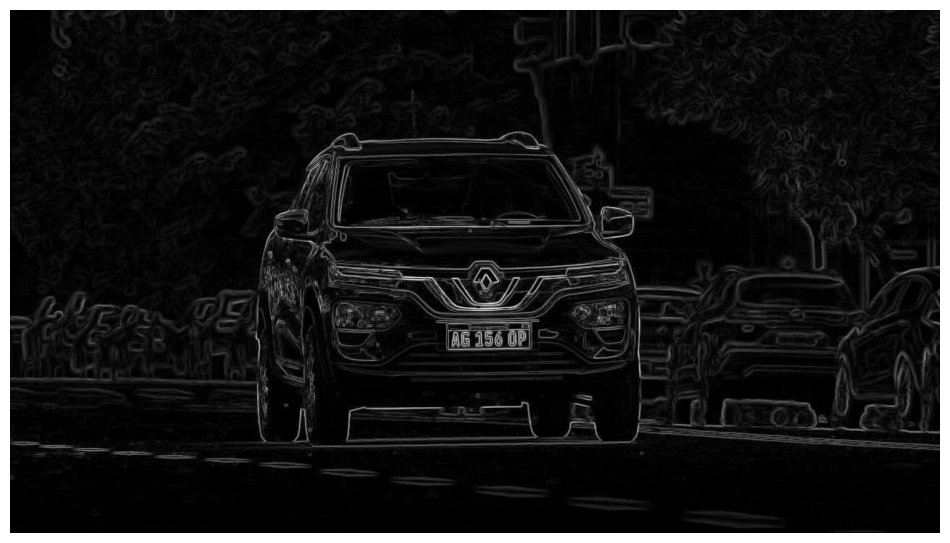

In [8]:
from skimage.filters import prewitt
from skimage import io, color
import matplotlib.pyplot as plt

# Cargo la imagen desde el archivo
imagen_archivo = io.imread('059.jpg')
# Si es RGB, la convierto a escala de grises
if imagen_archivo.ndim == 3:
    imagen_gris = color.rgb2gray(imagen_archivo)
else:
    imagen_gris = imagen_archivo  # Ya está en escala de grises

imagen_prewitt = prewitt(imagen_gris)

# Muestro la imagen de bordes
plt.figure(figsize=(12,12))
plt.imshow(imagen_prewitt, cmap='gray')
plt.axis("off")
plt.show()

##YOLOv5
YOLOv5 es una versión de los populares modelos YOLO (You Only Look Once) para la detección de objetos en imágenes y videos. Es uno de los modelos más utilizados para detectar objetos en tiempo real debido a su alta velocidad y precisión.

YOLOv5 es un modelo de detección de objetos basado en redes neuronales convolucionales (CNNs) esto lo hace más rápido que otros métodos de detección como R-CNN, que requieren múltiples pasos.

**Caracteristicas:**
* Velocidad en tiempo real: YOLOv5 está diseñado para ser rápido y eficiente, permitiendo su uso en sistemas con limitaciones de hardware (como cámaras de seguridad, drones o dispositivos móviles).
* Precisión: Es capaz de detectar una gran cantidad de objetos (más de 80 clases en el caso del modelo entrenado en el conjunto de datos COCO).
* Escalabilidad: YOLOv5 es flexible y tiene diferentes tamaños de modelo que van desde modelos más pequeños (rápidos pero menos precisos) hasta modelos más grandes (más lentos pero más precisos).
* Fácil de usar: YOLOv5 es fácil de implementar y tiene un gran ecosistema de soporte y herramientas adicionales.

**Resultado:**

Cuando se aplica YOLOv5 a una imagen, el modelo devuelve un conjunto de cajas delimitadoras (bounding boxes) alrededor de los objetos que ha identificado, junto con:
* Clase: El tipo de objeto detectado (por ejemplo, "coche", "persona", "perro", etc.).
* Confianza: La probabilidad de que el objeto detectado sea de la clase predicha.
* Coordenadas de la caja delimitadora: Las coordenadas (xmin, ymin, xmax, ymax) de la caja delimitadora.

In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

!pip install -U yolov5
!apt install tesseract-ocr
!pip install pytesseract

# Importar librerías necesarias
import torch
from matplotlib import pyplot as plt
from PIL import Image
import yolov5
import cv2
import pytesseract

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-20 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 1 person, 10 cars, 1 truck
Speed: 17.0ms pre-process, 513.2ms inference, 2.5ms NMS per image at shape (1, 3, 384, 640)


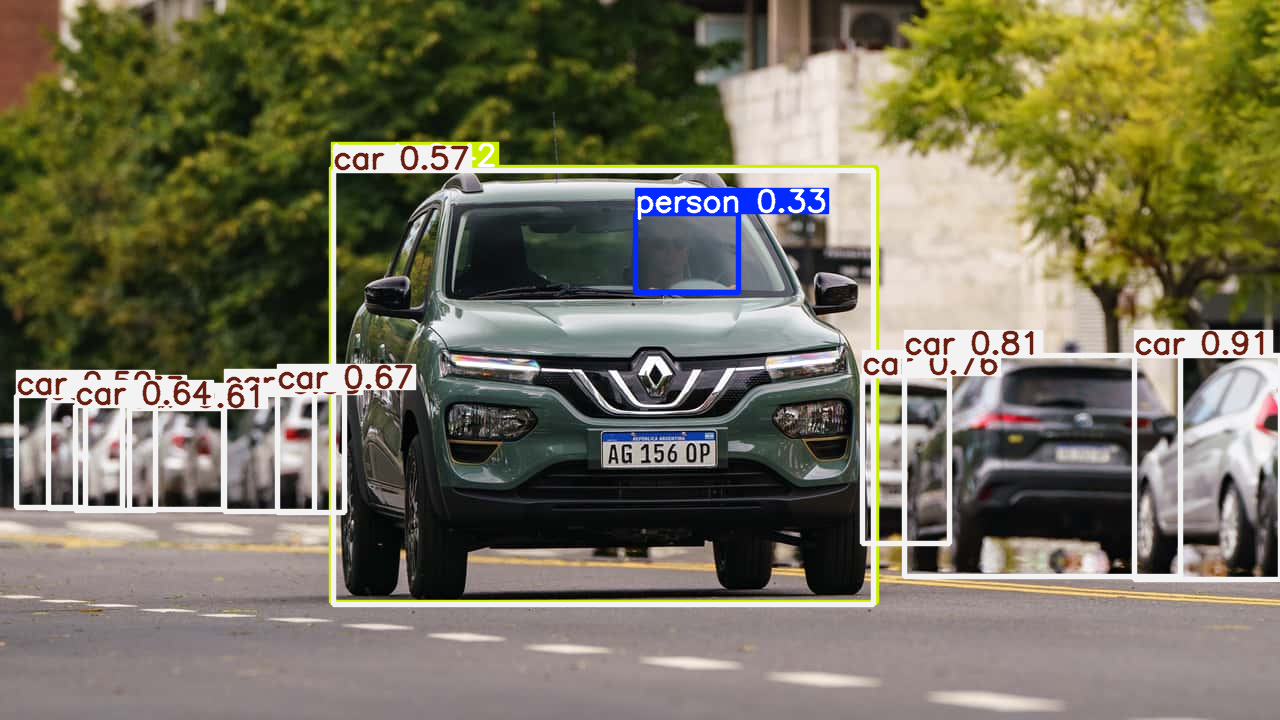

In [10]:
# Carga modelo preentrenado, se utiliza el modelo yolov5s que es una version mas liviana, alternativa de usar yolov5m,yolov5l,yolov5x
modelo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Carga imagen
img_path = '/content/059.jpg'
resultado = modelo(img_path)

# Mostrar resultados
resultado.print()           # Muestra etiquetas y confianza
resultado.show()            # Muestra imagen con bounding boxes

Otros modelos preentrenados:
* COCO: YOLOv5 puede ser entrenado en el conjunto de datos COCO (Common Objects in Context), que tiene 80 clases de objetos comunes. Los modelos preentrenados en COCO son muy versátiles y pueden detectar una amplia gama de objetos en escenas cotidianas.
* VOC: Los modelos también pueden ser entrenados en el conjunto de datos Pascal VOC, que contiene 20 clases de objetos y es útil para tareas de clasificación y detección de objetos en imágenes más estructuradas.
* Custom Datasets: Puedes entrenar o utilizar modelos que hayan sido preentrenados en conjuntos de datos personalizados, lo que es útil cuando necesitas detectar objetos muy específicos (por ejemplo, vehículos con una patente específica, productos industriales, etc.).

###Adicional: OCR placa patente

In [11]:
# Carga el modelo especializado en detección de patentes
model = yolov5.load('keremberke/yolov5s-license-plate')

# Configura parámetros del modelo
model.conf = 0.45  # Umbral minimo de confianza
model.iou = 0.45   # Umbral de IoU (elimina duplicados de deteccion)

# Carga y procesa la imagen
img = Image.open("/content/059.jpg")
results = model(img)

# Mostrar resultados
results.show()

# Obtiene las coordenadas de las detecciones
detections = results.pandas().xyxy[0]

# Itera sobre las detecciones y aplica OCR
# Recorre todas las detecciones y extrae los bordes de cada patente detectada
for index, row in detections.iterrows():
    x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    # Recorta la porción de la imagen que corresponde a la patente
    cropped_img = img.crop((x_min, y_min, x_max, y_max))

    # Convierte la imagen recortada a escala de grises para que el OCR funcione mejor
    gray = cv2.cvtColor(np.array(cropped_img), cv2.COLOR_RGB2GRAY)

    # Aplica OCR, configura el modo de segmentación de página. El 7 indica que se espera una sola línea de texto (como las patentes)
    text = pytesseract.image_to_string(gray, config='--psm 7')

    print(f"Patente detectada: {text.strip()}")

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Showing images is not supported in this environment: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - argument for rectangle() given by name ('thickness') and position (4)
>  - argument for rectangle() given by name ('thickness') and position (4)

Patente detectada: FAG 156 OP|
Patente detectada: oe


**model.conf:** Umbral de confianza mínima
Este valor define cuán seguro debe estar el modelo antes de considerar una detección como válida.

Valores típicos:

* 0.25 → Detecta más objetos (más sensibilidad, pero más falsos positivos).
* 0.40 a 0.60 → Punto medio ideal si tenés detecciones decentes.
* 0.70 o más → Muy estricto (menos falsos positivos, pero puede perder detecciones reales).

Recomendado para patentes:

model.conf = 0.4 o 0.5 suele ser un buen equilibrio. Si tu modelo está reconociendo muchas cosas que no son patentes, podés subirlo.

**model.iou:** Umbral de superposición para eliminar duplicados
El parámetro IOU (Intersection over Union) se usa en Non-Maximum Suppression (NMS) para decidir cuándo dos cajas predichas se consideran duplicadas.

Valores típicos:

* 0.3 → Muy estricto, puede eliminar verdaderos positivos si las cajas son muy parecidas.
* 0.4 a 0.5 → Rango estándar y balanceado.
* 0.6 o más → Permite más solapamiento, puede mantener más cajas duplicadas.

Recomendado para patentes:

model.iou = 0.45 funciona bien en la mayoría de los casos. Si el modelo deja pasar demasiadas cajas repetidas, podés bajarlo a 0.4 o 0.35.

##Resumen
1. Scikit-Image (skimage.feature.canny)
  - Ventajas:
    - Muy preciso para bordes finos.
    - Permite configurar sigma, low_threshold, high_threshold, y mask.
    - Muy eficiente para imágenes en escala de grises.
    - Fácil de integrar con otras funciones de skimage.
  - Desventajas:
    - No se puede aplicar directamente sobre imágenes RGB (hay que convertir a gris).
    - No detecta objetos o estructuras grandes, solo los contornos.
    - Sensible a ruido si no se ajusta el sigma.

2. Filtros Sobel y Prewitt (skimage.filters)
  - Ventajas:
    - Muy rápidos computacionalmente.
    - Sobel da más peso al centro (resalta mejor bordes principales).
    - Prewitt es más simple y general, con respuesta más suave.
  - Desventajas:
    - No tan precisos como Canny.
    - Generan bordes gruesos o duplicados.
    - No permiten control tan fino como canny.



**(5) Tipos de borde**
1. Bordes Clásicos o Locales
  - Estos son los bordes que detectan los algoritmos tradicionales como Canny, Sobel, Prewitt.
  - Se basan en cambios bruscos de intensidad de píxeles.
  - Ejemplo:Detectan el borde entre un auto y el fondo solo si hay un cambio claro de color o brillo. Si el auto y el fondo tienen colores similares, no lo detectan bien.

2. Bordes Contextuales
  - Estos bordes son interpretados en contexto, es decir, no se basan solo en el cambio de color o brillo, sino en qué parte de la imagen es.
  - Una red neuronal ha "visto" muchas imágenes y aprende que un parabrisas, por ejemplo, suele estar entre dos zonas oscuras.
  - Aunque no haya un cambio fuerte de color, puede inferir que hay un borde ahí.
  - Ejemplo: Un coche negro contra asfalto oscuro puede no tener bordes claros, pero un modelo como HED sí detecta el contorno completo del coche.

3. Bordes Semánticos
  - Estos ya van más allá del borde físico. Son los bordes de objetos definidos por su significado.
  - Detectan los límites de "un perro", "un auto", "una persona", aunque esos límites no tengan contrastes claros.
  - Este tipo de borde no solo depende de la textura, sino de lo que el modelo entiende que hay ahí.
  - Ejemplo: En una imagen con una persona parcialmente tapada, una red como Mask R-CNN puede igual segmentar todo el cuerpo porque entiende lo que es una persona.

Tipo de borde
  * Local
    - Cambios de color/gradiente
      - Sobel
      - Canny
  * Contextual
    - Contornos implícitos por forma
      - HED
      - FCN
  * Semántico
    - Objetos completos con sentido
      - DeepLab
      - Mask R-CNN